In [1]:
import numpy as np
from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile
import librosa

import IPython.display as ipd
import librosa.display

import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
audio_path = 'dataset/BWAVN/78-368-0049.wav'
sample_rate, samples = wavfile.read(str(audio_path))

In [3]:
len(samples)

217440

### Audio with noise

In [4]:
ipd.Audio(samples, rate = sample_rate)


In [5]:
print("Total audio length" , len(samples)/ sample_rate)

Total audio length 13.59


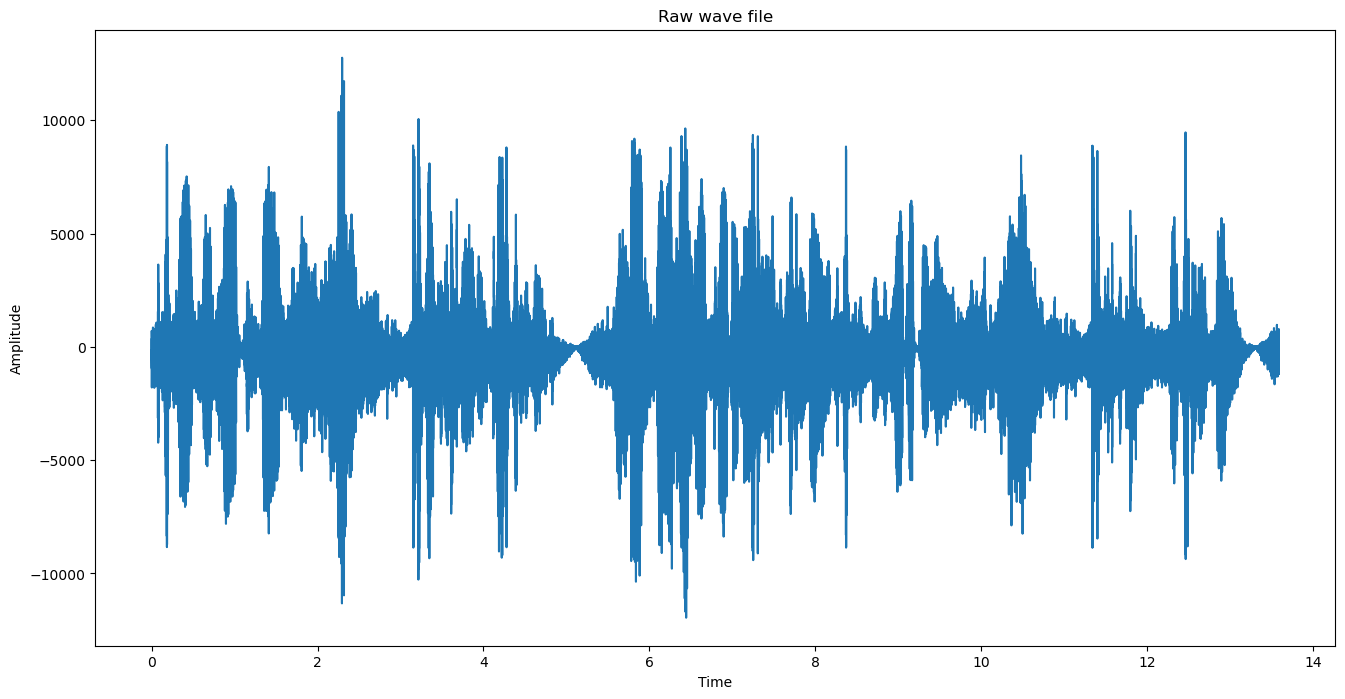

In [6]:
fig = plt.figure(figsize = (16, 8))
plt.title("Raw wave file")
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.plot(np.linspace(0,len(samples)/sample_rate, len(samples)), samples)

#Or could just use librosa.display.waveshow( y = samples, sr = sample_rate)

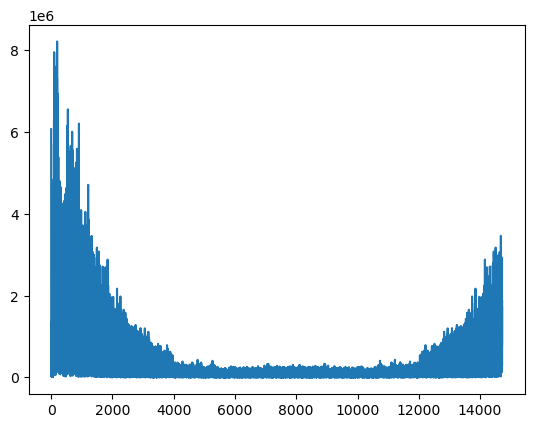

In [8]:
# sampes_fft = samples - samples.mean()
# fft_signal = np.fft.fft(samples)
# plt.plot(fft_signal[0:int(len(samples)/2.)])

import scipy
fft_signal = scipy.fft.fft(samples)
magnitude = np.absolute(fft_signal)
frequency = np.linspace(0, sample_rate, len(magnitude))

plt.plot(frequency[10:200000], magnitude[10:200000])

In [10]:
#max_amplitude 
max_amplitude = np.max(magnitude[10:200000])

threshold = 0.2 * max_amplitude 

fft_signal[magnitude > threshold] = 0 

fft_signal[magnitude <  0.01 * max_amplitude ] = 0
    

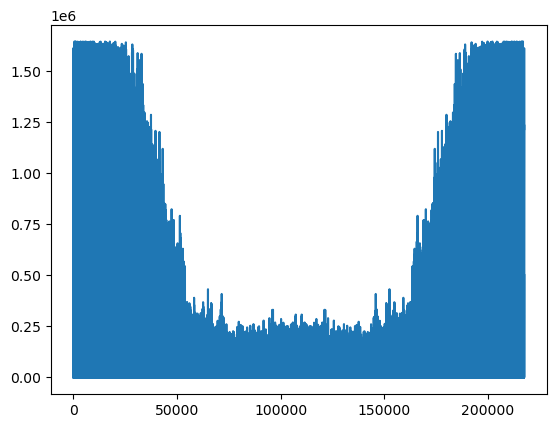

In [13]:
#After removing frequencies of low and high amplitude
plt.plot(np.absolute(fft_signal)) 

In [14]:
#Applying inverse fourier transform to get the original signal 
filtered_signal = scipy.fft.ifft(fft_signal)

# real_filtered_signal = np.real(filtered_signal)

In [15]:
ipd.Audio(filtered_signal, rate = sample_rate )

D:\anaconda3\Lib\site-packages\IPython\lib\display.py:172: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)


### Didn't remove any noise from the audio.. the audio is complex for this logic. 